In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [259]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)


In [525]:
dorothea_signatures_removed_pc1 = pd.read_csv('dorothea_ABC_signatures_lm_sh.csv', index_col =0)

In [526]:
metadata = pd.read_csv('sasaki_data.csv', index_col = 0)
metadata = metadata.set_index('GeneSymbol', drop=True)

In [527]:
kinases = list(metadata[metadata['Function'] == 'kinase'].index)
phosphatases = list(metadata[metadata['Function'] == 'phosphatase'].index)

In [528]:
common_genes = np.intersect1d(kinases+phosphatases, dorothea_signatures_removed_pc1.index)

In [529]:
df = dorothea_signatures_removed_pc1.loc[common_genes].T
model = AgglomerativeClustering(linkage='average', n_clusters=15) # 10
clusters = pd.Series(model.fit_predict(df),index=df.index)
cluster_colors = clusters.map(dict(zip(clusters.unique(),
                                       list(reversed(sns.color_palette("Spectral", len(clusters.unique())).as_hex())))))

df = dorothea_signatures_removed_pc1.loc[common_genes]
model = AgglomerativeClustering(linkage='average', n_clusters=6) #4
pert_clusters = pd.Series(model.fit_predict(df),index=df.index)
pert_cluster_colors = pert_clusters.map(dict(zip(pert_clusters.unique(),
                                       list(reversed(sns.color_palette("Pastel2", len(pert_clusters.unique())).as_hex())))))



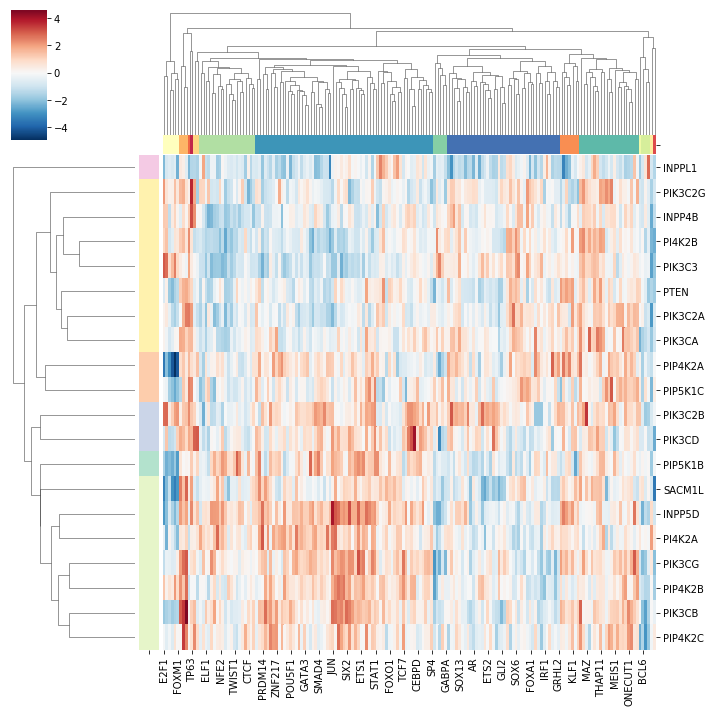

In [530]:
sns.clustermap(dorothea_signatures_removed_pc1.loc[common_genes], cmap = 'RdBu_r', 
               col_colors = cluster_colors, row_colors = pert_cluster_colors, center = 0)

In [531]:
def highlight_max(s):
    if s.dtype == np.object:
        is_neg = [False for _ in range(s.shape[0])]
    else:
        is_neg = s < 0
    return ['color: blue;' if cell else 'color:red' 
            for cell in is_neg]

In [532]:
pi3ks_and_pten = ['PIK3CA', 'PIK3CD', 'PIK3C2A', 'PIK3C2G', 'PIK3C3', 'PTEN']
dorothea_signatures_removed_pc1.loc[pi3ks_and_pten,foxos].style.apply(highlight_max)

,FOXO1,FOXO3,FOXO4
PIK3CA,0.300582,-1.351718,-0.436814
PIK3CD,-1.059868,-0.437731,0.529047
PIK3C2A,0.434504,-1.720287,-0.007614
PIK3C2G,0.545413,-0.971075,0.171562
PIK3C3,-0.260645,-1.790318,-0.808233
PTEN,1.155683,-0.063758,0.055430


In [533]:
foxos = [s for s in dorothea_signatures_removed_pc1.columns if 'FOXO' in s]

In [534]:
# Perturbations: Cluster 0 (pink) and TFs: cluster 4 (blue)

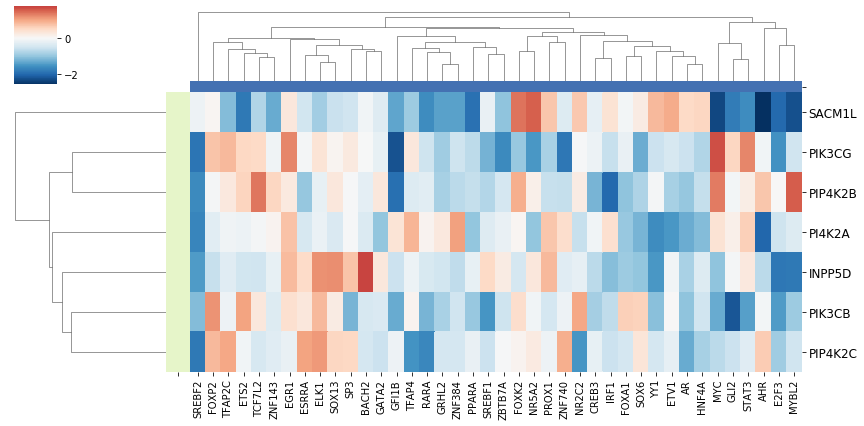

In [535]:
g = sns.clustermap(dorothea_signatures_removed_pc1.loc[pert_clusters[pert_clusters == 1].index, 
                   clusters[clusters == 0].index], cmap = 'RdBu_r', center = 0, 
                   col_colors = cluster_colors, row_colors = pert_cluster_colors, figsize = (12, 6))
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 12)

plt.show()


In [536]:
for i in range(len(clusters.unique())):
    print(i, len(clusters[clusters == i].index))

0 40
1 21
2 63
3 6
4 2
5 5
6 20
7 1
8 1
9 1
10 3
11 7
12 3
13 1
14 1


In [537]:
# dorothea_signatures = pd.read_csv('dorothea_ABC_signatures_lm_sh.csv', index_col =0)

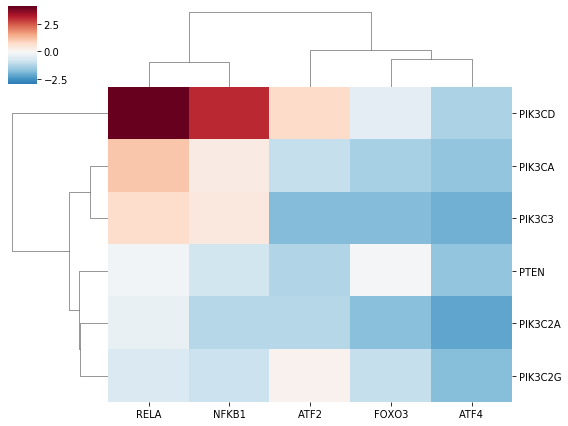

In [540]:
sns.clustermap(dorothea_signatures_removed_pc1.loc[pi3ks_and_pten, ['FOXO3', 'RELA', 'NFKB1', 'ATF2', 'ATF4']],
               cmap = 'RdBu_r', figsize = (8, 6), center = 0, vmin = -3)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [543]:
signatures_removed_pc1 = pd.read_csv('signatures_lm_sh_pc1_removed.csv', index_col =0)
signatures_removed_pc1 = signatures_removed_pc1.T

In [544]:
[s for s in signatures_removed_pc1.columns if 'RAC' in s]

['RAC2']

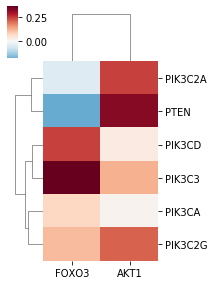

In [545]:
sns.clustermap(signatures_removed_pc1.loc[pi3ks_and_pten, ['FOXO3', 'AKT1']],
               cmap = 'RdBu_r', figsize = (3, 4), center = 0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [485]:
dorothea_signatures_removed_pc1.index

Index(['NOSIP', 'WIF1', 'CAMK2G', 'HSF5', 'MELK', 'TRCN0000199774', 'NPFFR2',
       'TRCN0000061501', 'CCT7', 'TXNIP',
       ...
       'CHAF1B', 'ZNF607', 'THBD', 'FABP6', 'SOX10', 'RPS3A', 'ZNF583', 'TLE2',
       'KLHL6', 'CDH3'],
      dtype='object', length=4917)

In [486]:
[s for s in dorothea_signatures_removed_pc1.index if 'INPP' in s]

['INPP4B', 'INPPL1', 'INPP1', 'INPP5D']